In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

savedir = "../data/processed"

In [2]:
file_path = os.path.join(savedir, "AccessibilityEdges.csv")
accessibility = pd.read_csv(file_path)

In [5]:
file_path = os.path.join(savedir, "SA2PopulationData.csv")
population = pd.read_csv(file_path)

### Data insights

In [6]:
population.head()

,SA2_5DIG16,SA2_name,SA2_area,SA2_population,SA2_population_percentage,SA2_population_density
0,11007,Braidwood,3418.3525,4330.0,0.016856,1.3
1,11008,Karabar,6.9825,8546.0,0.033268,1223.9
2,11009,Queanbeyan,4.7620,11370.0,0.044262,2387.7
3,11010,Queanbeyan - East,13.0032,5093.0,0.019826,391.7
4,11012,Queanbeyan West - Jerrabomberra,13.6748,12743.0,0.049607,931.9


In [62]:
population['SA2_population_density'].max()

31052.4

In [7]:
accessibility.groupby('SA2_5DIG').sum()['accessible']

SA2_5DIG
11008    9
11009    9
11010    9
11011    1
11012    9
        ..
91002    0
91003    0
91004    0
99499    0
99799    0
Name: accessible, Length: 2309, dtype: int64

In [8]:
accessibility_per_sa = accessibility.groupby('SA2_5DIG').sum()['accessible'].to_list()

In [9]:
accessibility.groupby('SA2_5DIG').sum().loc[accessibility.groupby('SA2_5DIG').sum()['accessible']==100]

,hospital_ID,accessible,further_than_2h
SA2_5DIG,,,
21132,511566,100,850
21134,511566,100,855
21146,511566,100,855
21147,511566,100,855
21150,511566,100,855
21165,511566,100,855
21195,511566,100,856


In [10]:
from collections import Counter
counter_obj = Counter(accessibility_per_sa)
counter_obj

Counter({9: 119,
         1: 276,
         0: 270,
         2: 197,
         3: 106,
         6: 87,
         5: 106,
         7: 31,
         8: 63,
         4: 58,
         10: 25,
         11: 13,
         60: 6,
         54: 11,
         41: 3,
         57: 8,
         14: 19,
         12: 39,
         27: 21,
         44: 9,
         37: 36,
         51: 4,
         35: 37,
         24: 15,
         31: 33,
         34: 30,
         22: 8,
         62: 5,
         63: 2,
         70: 6,
         61: 5,
         56: 5,
         66: 5,
         78: 14,
         80: 6,
         71: 6,
         68: 6,
         77: 4,
         75: 5,
         73: 8,
         74: 5,
         55: 9,
         53: 3,
         59: 5,
         50: 9,
         58: 3,
         67: 8,
         84: 4,
         69: 8,
         82: 5,
         81: 11,
         76: 12,
         65: 9,
         72: 8,
         85: 7,
         91: 7,
         86: 7,
         87: 7,
         83: 7,
         92: 2,
         79: 6,
    

In [11]:
accessibility_per_sa_df = accessibility.groupby('SA2_5DIG').sum()[['accessible']].reset_index(drop=False)
accessibility_per_sa_df

,SA2_5DIG,accessible
0,11008,9
1,11009,9
2,11010,9
3,11011,1
4,11012,9
...,...,...
2304,91002,0
2305,91003,0
2306,91004,0
2307,99499,0


### Merge Population and Accessibility Data

In [12]:
population['SA2_5DIG16'] = population['SA2_5DIG16'].astype(str)
accessibility_per_sa_df['SA2_5DIG'] = accessibility_per_sa_df['SA2_5DIG'].astype(str)
new_df = pd.merge(accessibility_per_sa_df, population, how='left', left_on='SA2_5DIG', right_on='SA2_5DIG16')

In [13]:
list(new_df.columns)

['SA2_5DIG',
 'accessible',
 'SA2_5DIG16',
 'SA2_name',
 'SA2_area',
 'SA2_population',
 'SA2_population_percentage',
 'SA2_population_density']

### Visualizations

In [97]:
bin_edges = range(0,int(max(new_df['SA2_population']))+1000, 1000)
new_df['bins'] = pd.cut(new_df['SA2_population'], bins=bin_edges)
binned_averages = new_df.groupby('bins')['accessible'].mean()

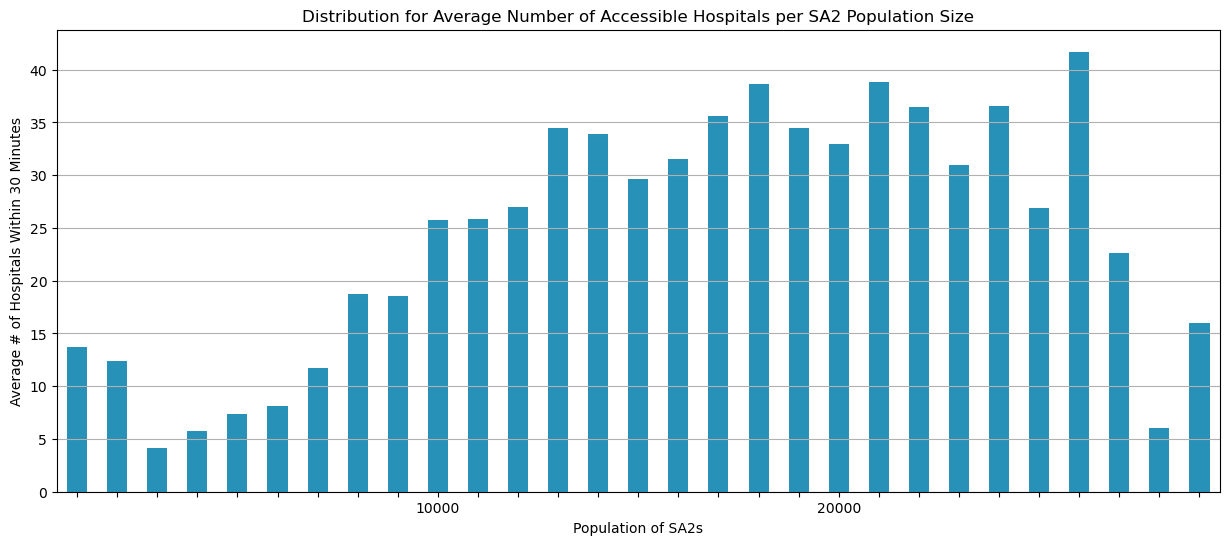

In [98]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 6))
binned_averages.plot(kind='bar', ax=ax, color='#2791b8')

# Set custom x-axis tick labels

labels = [10, 20]
custom_ticks = []
for i in range(29):
    tick = ''
    if i+1 in labels:
        tick = (i+1)*1000
    custom_ticks += [tick]
ax.set_xticklabels(custom_ticks, rotation=0)

# Set labels and title
ax.set_xlabel('Population of SA2s')
ax.set_ylabel('Average # of Hospitals Within 30 Minutes')
ax.set_title('Distribution for Average Number of Accessible Hospitals per SA2 Population Size')
ax.grid(True, axis='y')

# Show the plot
plt.show()

In [95]:
bin_edges = range(0,int(max(new_df['SA2_population_density']))+1000, 1000)
new_df['bins'] = pd.cut(new_df['SA2_population_density'], bins=bin_edges)
binned_averages = new_df.groupby('bins')['accessible'].mean()

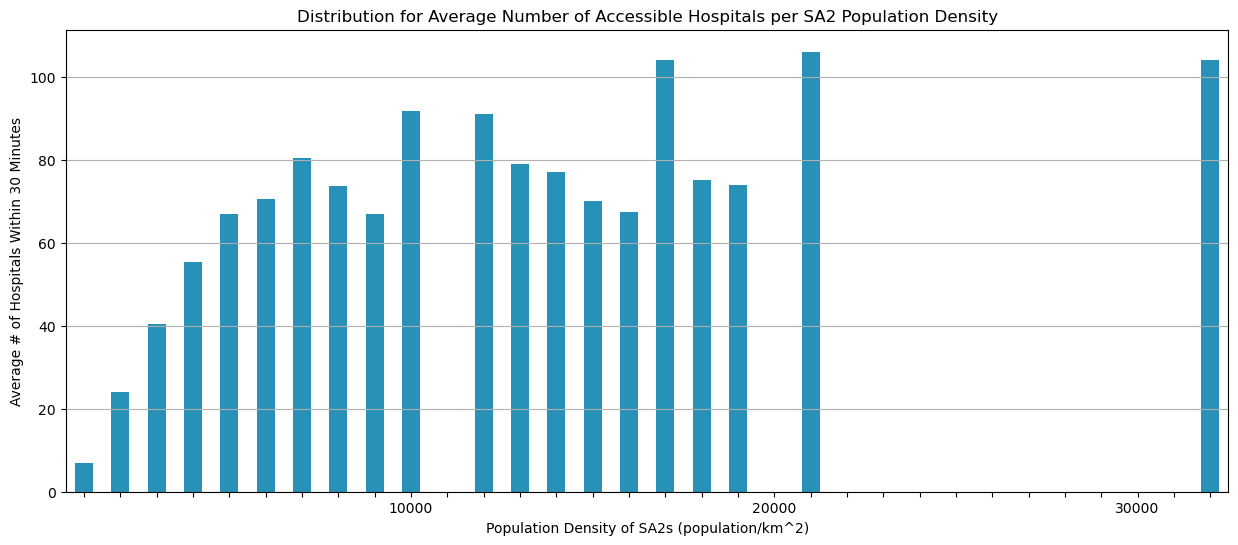

In [96]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 6))
binned_averages.plot(kind='bar', ax=ax, color='#2791b8')

# Set custom x-axis tick labels

labels = [10, 20, 30]
custom_ticks = []
for i in range(32):
    tick = ''
    if i+1 in labels:
        tick = (i+1)*1000
    custom_ticks += [tick]
ax.set_xticklabels(custom_ticks, rotation=0)

# Set labels and title
ax.set_xlabel('Population Density of SA2s (population/km^2)')
ax.set_ylabel('Average # of Hospitals Within 30 Minutes')
ax.set_title('Distribution for Average Number of Accessible Hospitals per SA2 Population Density')
ax.grid(True, axis='y')

# Show the plot
plt.show()

In [66]:
new_df.loc[new_df['SA2_population_density']>25000]

,SA2_5DIG,accessible,SA2_5DIG16,SA2_name,SA2_area,SA2_population,SA2_population_percentage,SA2_population_density,bins
776,21122,104,21122,Melbourne CBD - North,0.5616,17439.0,0.067888,31052.4,"(31000, 32000]"


<AxesSubplot:xlabel='SA2_population', ylabel='accessible'>

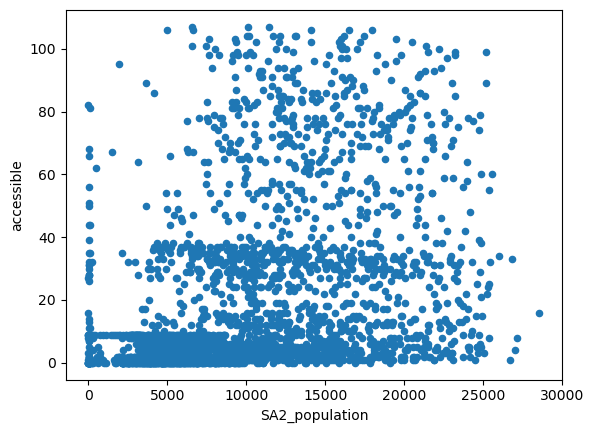

In [38]:
new_df.plot.scatter('SA2_population', 'accessible')

<AxesSubplot:xlabel='SA2_population_density', ylabel='accessible'>

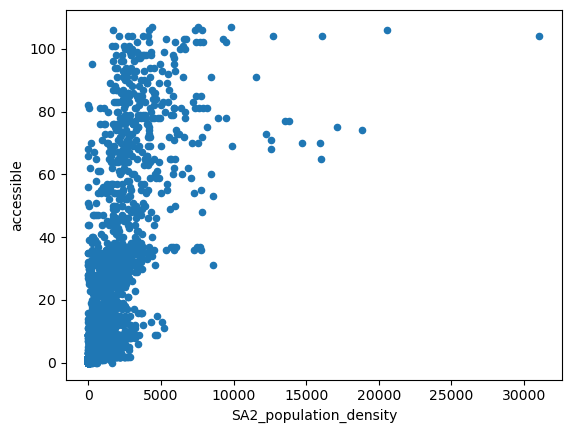

In [29]:
new_df.plot.scatter('SA2_population_density', 'accessible')

### Summary info

In [76]:
amount_SA2_no_hospitals = len(new_df.loc[new_df['accessible']==0, 'SA2_5DIG'])
total_amount_SA2 = len(new_df)
percentage_SA2_no_hospital = (float(amount_SA2_no_hospitals)/int(total_amount_SA2))*100
people_no_hospital = new_df.loc[new_df['accessible']==0, 'SA2_population'].sum()
total_people = new_df['SA2_population'].sum()
percentage_people_no_hospital = (float(people_no_hospital)/int(total_people))*100
print(" Amount of SA2s that do not have a hospital within 30 minutes: " + str(int(amount_SA2_no_hospitals))+ "\n",
      "Total amount of SA2 in Australia: " + str(int(total_amount_SA2)) + "\n",
      "Percentage of SA2 without accessible hospital in Australia: " + str((percentage_SA2_no_hospital)) + "\n\n",
      "Amount of people that do not have a hospital within 30 minutes: " + str(int(people_no_hospital)) + "\n",
      "Total amount of people in Australia: " + str(int(total_people)) + "\n",
      "Percentage of people without accessible hospital in Australia: " + str((percentage_people_no_hospital)) + "\n",
      )

 Amount of SA2s that do not have a hospital within 30 minutes: 271
 Total amount of SA2 in Australia: 2472
 Percentage of SA2 without accessible hospital in Australia: 10.962783171521036

 Amount of people that do not have a hospital within 30 minutes: 1161958
 Total amount of people in Australia: 25683749
 Percentage of people without accessible hospital in Australia: 4.5240980979840595



In [72]:
len(new_df.loc[(new_df['SA2_population'].notna())&(new_df['accessible'] == 0)])

225

In [71]:
new_df.loc[(new_df['SA2_population'].isna())&(new_df['accessible'] == 0)]

,SA2_5DIG,accessible,SA2_5DIG16,SA2_name,SA2_area,SA2_population,SA2_population_percentage,SA2_population_density,bins
69,11075,0,11075,Wollangambe - Wollemi,2448.7276,NaN,NaN,NaN,NaN
346,11342,0,11342,Centennial Park,1.9786,NaN,NaN,NaN,NaN
641,19499,0,19499,No usual address (NSW),NaN,NaN,NaN,NaN,NaN
642,19799,0,19799,Migratory - Offshore - Shipping (NSW),NaN,NaN,NaN,NaN,NaN
728,21080,0,21080,Alps - East,2071.2834,NaN,NaN,NaN,NaN
731,21083,0,21083,Lake King,93.8744,NaN,NaN,NaN,NaN
1166,29499,0,29499,No usual address (Vic.),NaN,NaN,NaN,NaN,NaN
1167,29799,0,29799,Migratory - Offshore - Shipping (Vic.),NaN,NaN,NaN,NaN,NaN
1268,31102,0,31102,Mount Coot-tha,14.5975,NaN,NaN,NaN,NaN
1439,31279,0,31279,Lake Manchester - England Creek,112.8254,NaN,NaN,NaN,NaN


In [25]:
new_df.loc[new_df['accessible']==0, 'NR_OF_PEOPLE_2016'].sum()

1118880.0

In [26]:
new_df['NR_OF_PEOPLE_2016'].sum()

24202256.0

In [27]:
20/100

0.2